<a href="https://colab.research.google.com/github/rohanvitrouthu/sectoralstockanalysis/blob/main/Fast_Moving_Consumer_Goods_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
dataset_path = '/content/drive/MyDrive/DATA 606 Capstone/Dataset/Merged Data'

In [6]:
# Load the data for a specific sector from its CSV file
sector_data = pd.read_csv(f"{dataset_path}/FMCG.csv")

In [7]:
# Display basic information about the dataset
print(sector_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18723 entries, 0 to 18722
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                18723 non-null  object 
 1   Symbol              18723 non-null  object 
 2   Series              18723 non-null  object 
 3   Prev Close          18723 non-null  float64
 4   Open                18723 non-null  float64
 5   High                18723 non-null  float64
 6   Low                 18723 non-null  float64
 7   Last                18723 non-null  float64
 8   Close               18723 non-null  float64
 9   VWAP                18723 non-null  float64
 10  Volume              18723 non-null  int64  
 11  Turnover            18723 non-null  float64
 12  Trades              9824 non-null   float64
 13  Deliverable Volume  17185 non-null  float64
 14  %Deliverble         17185 non-null  float64
dtypes: float64(11), int64(1), object(3)
memory usage: 2.1

In [8]:
# Summary statistics of the dataset
print(sector_data.describe())

         Prev Close          Open          High           Low          Last  \
count  18723.000000  18723.000000  18723.000000  18723.000000  18723.000000   
mean    1915.693647   1918.209710   1941.947137   1892.869030   1916.466015   
std     3012.086210   3017.211554   3050.666324   2979.268838   3013.646769   
min      106.150000    103.100000    108.000000    100.500000    105.750000   
25%      264.650000    264.875000    267.450000    261.650000    264.750000   
50%      675.100000    674.900000    685.000000    663.500000    675.000000   
75%     2138.775000   2139.500000   2165.975000   2112.000000   2140.000000   
max    18732.700000  18844.000000  18844.000000  18520.000000  18720.000000   

              Close          VWAP        Volume      Turnover         Trades  \
count  18723.000000  18723.000000  1.872300e+04  1.872300e+04    9824.000000   
mean    1916.564544   1917.317225  2.664991e+06  1.057536e+14   45277.551405   
std     3013.940286   3014.616298  6.127360e+06 

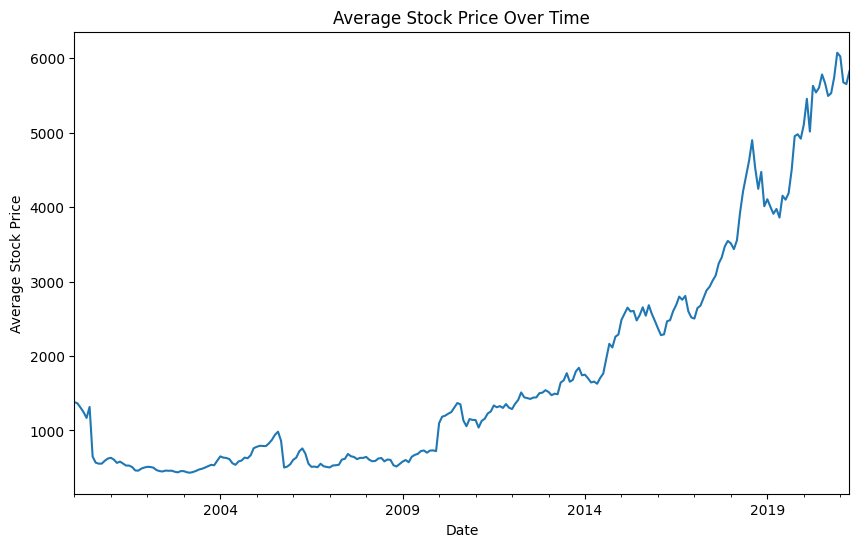

In [9]:
# Plotting average stock price over time
plt.figure(figsize=(10, 6))
sector_data['Date'] = pd.to_datetime(sector_data['Date'])
sector_data.set_index('Date', inplace=True)
sector_data['Close'].resample('M').mean().plot()
plt.title('Average Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Stock Price')
plt.show()

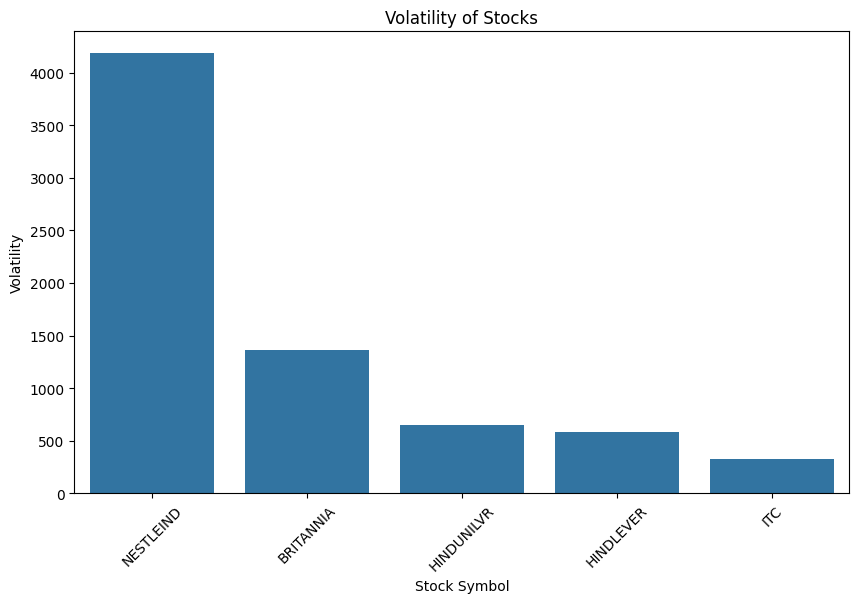

In [10]:
# Calculate volatility of stocks
volatility = sector_data.groupby('Symbol')['Close'].std().sort_values(ascending=False)

# Plotting volatility of stocks
plt.figure(figsize=(10, 6))
sns.barplot(x=volatility.index, y=volatility.values)
plt.title('Volatility of Stocks')
plt.xlabel('Stock Symbol')
plt.ylabel('Volatility')
plt.xticks(rotation=45)
plt.show()

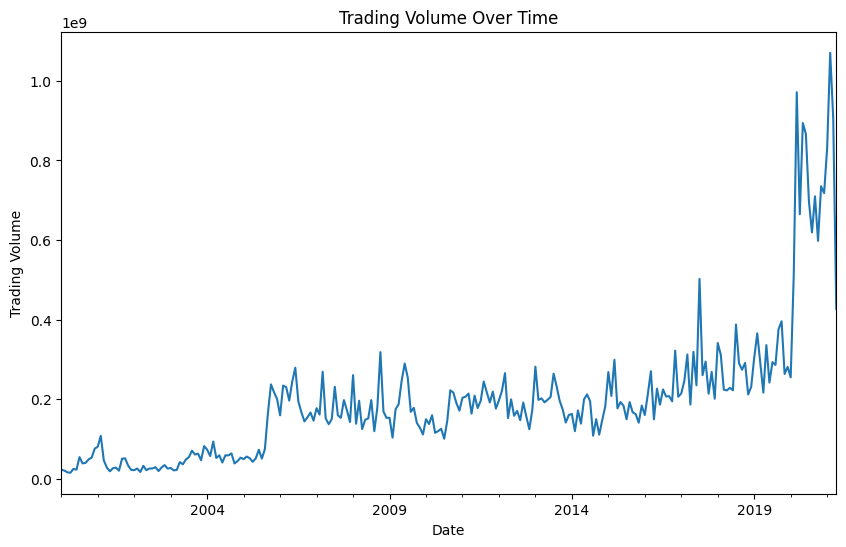

In [11]:
# Plotting trading volume over time
plt.figure(figsize=(10, 6))
sector_data['Volume'].resample('M').sum().plot()
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.show()


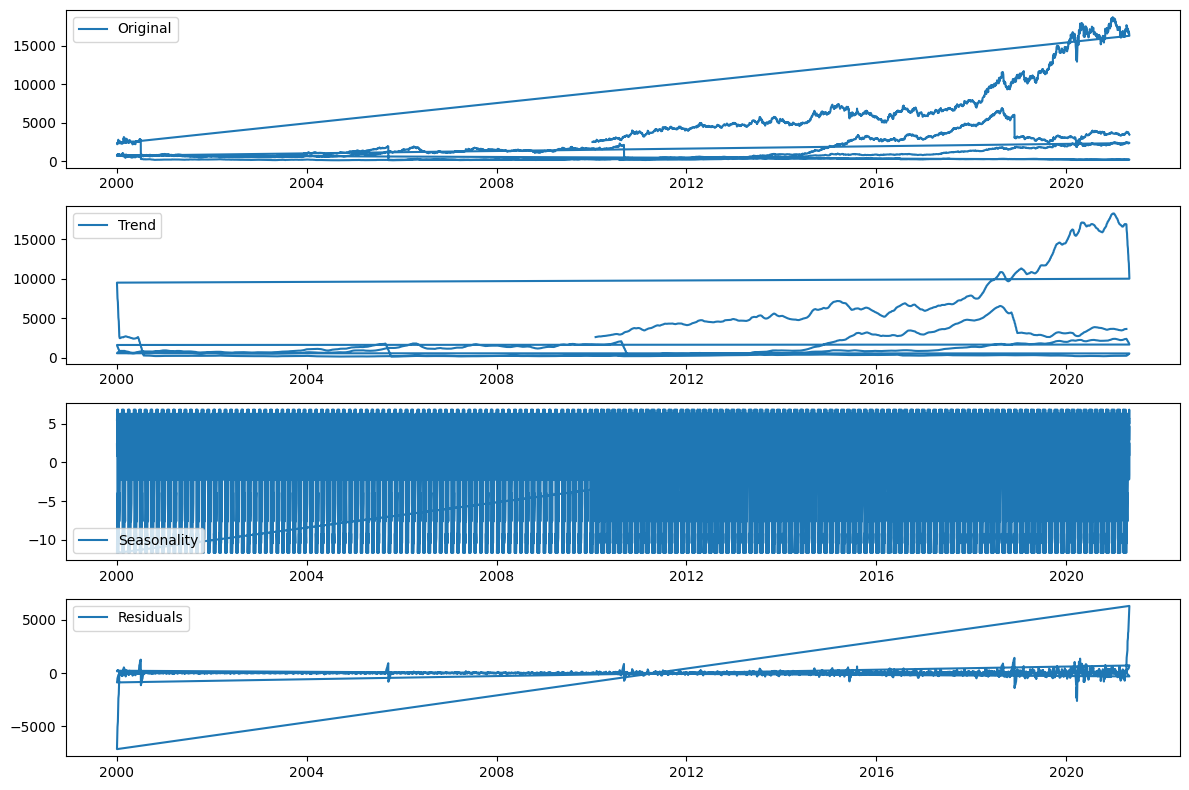

In [12]:
# Seasonal decomposition of stock prices
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sector_data['Close'], model='additive', period=30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(sector_data['Close'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

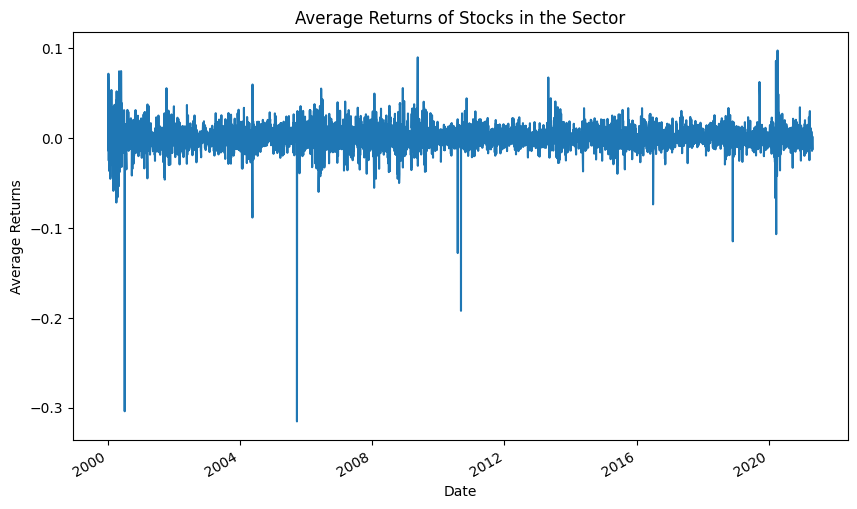

In [13]:
# Calculate daily returns for each stock
sector_data['Return'] = sector_data.groupby('Symbol')['Close'].pct_change()

# Calculate average returns for all stocks in the sector
average_returns = sector_data.groupby('Date')['Return'].mean()

# Plotting average returns over time
plt.figure(figsize=(10, 6))
average_returns.plot()
plt.title('Average Returns of Stocks in the Sector')
plt.xlabel('Date')
plt.ylabel('Average Returns')
plt.show()